In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

from collections import Counter

## 11
### A

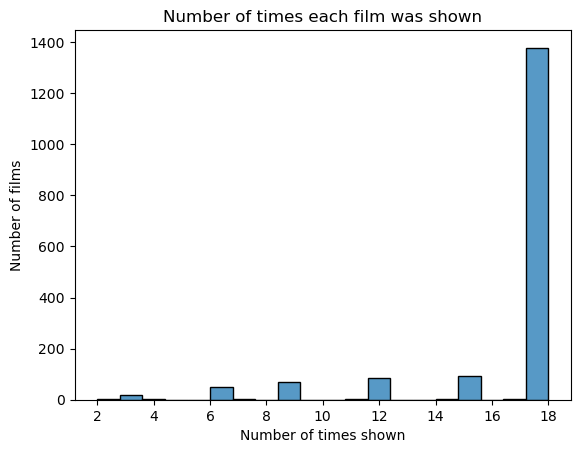

In [62]:
films_day = pd.read_stata('films_day.dta')
films_day_titles = Counter(films_day['title'])

# plot number of times each film was shown by title using histogram and sns - MV
sns.histplot(films_day_titles, bins=20)

# add labels and title
plt.xlabel('Number of times shown')
plt.ylabel('Number of films')
plt.title('Number of times each film was shown')
plt.show()

### B

In [63]:
print(len(films_day['title'].unique()))
films_day = films_day[films_day['dropped']== 0]
print(len(films_day['title'].unique()))

1698
1381


### C

In [64]:
print(f"{films_day.iloc[0, :].title} has smallest date value {films_day[films_day['title'] == films_day.iloc[0, :].title].date.min()} and was released on July 17, 2009")
print(f"{films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min()} days before July 17, 2009 is {(pd.to_datetime('2009-07-17') - pd.Timedelta(days=films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min())).date()}")
reference_date = (pd.to_datetime('2009-07-17') - pd.Timedelta(days=films_day[films_day['title'] == films_day.iloc[0, :]['title']]['date'].min())).date()

(500) Days of Summer has smallest date value 18116 and was released on July 17, 2009
18116 days before July 17, 2009 is 1959-12-11


### D

In [65]:
reference_date = pd.to_datetime(reference_date)

# Apply a function to calculate new date for each film
films_day['new_date'] = films_day['date'].apply(lambda x: (reference_date + pd.Timedelta(days=x) - pd.Timedelta(days=1)))

films_day['new_date']

0       2009-07-17
1       2009-03-06
2       2010-11-04
3       2004-04-03
4       2007-06-02
           ...    
28245   2002-09-07
28246   2002-09-05
28247   2002-09-12
28248   2002-09-13
28249   2002-09-14
Name: new_date, Length: 24855, dtype: datetime64[ns]

### E

In [66]:
# dummy for friday, saturday, and sunday
films_day['friday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 4 else 0)
films_day['saturday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 5 else 0)
films_day['sunday'] = films_day['new_date'].apply(lambda x: 1 if x.weekday() == 6 else 0)

### F

In [69]:
# create dummies for each week of the year
films_day['week'] = films_day['new_date'].apply(lambda x: x.weekofyear)
films_day['week'] = films_day['week'].astype('category')
films_day = pd.get_dummies(films_day, columns=['week'], drop_first=True)

### G

In [70]:
# create dummies for each year 
films_day['year'] = films_day['new_date'].apply(lambda x: x.year)
films_day['year'] = films_day['year'].astype('category')
films_day = pd.get_dummies(films_day, columns=['year'], drop_first=True)


### H